<a href="https://githubtocolab.com/alevant/mlcourse-Nov22/blob/main/linear_regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

In [1]:
!git clone https://github.com/alevant/mlcourse-Nov22 mlcourse

Cloning into 'mlcourse'...
remote: Enumerating objects: 101, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 101 (delta 24), reused 2 (delta 2), pack-reused 53
Receiving objects: 100% (101/101), 9.45 MiB | 29.96 MiB/s, done.
Resolving deltas: 100% (37/37), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime


This is ice cream data  - x- independent varalbe - temp, y- sales

In [3]:
x = np.array([14.2, 16.4, 11.9, 15.2,18.5, 22.1, 19.4, 25.1, 23.4, 18.1, 22.6, 17.2])
y = np.array([215,325,185,332,406,522,412,614,544,421,445,408])

Let's plot a scatter plot

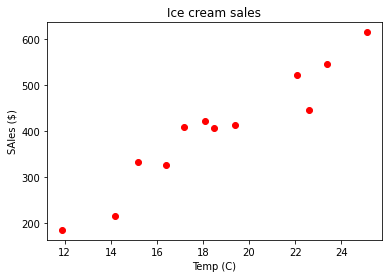

In [4]:
plt.scatter(x,y, color = 'red')
plt.title('Ice cream sales')
plt.xlabel('Temp (C)')
plt.ylabel('SAles ($)')
plt.show()



Train model on the data



In [5]:
# training the simple linear regresion on trainning set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
x = x.reshape(-1, 1)
regressor.fit(x,y)
y_predict = regressor.predict(x)

In [6]:
print('The parameters of the model y=ax+b are')
print(f'a={regressor.coef_[0]}')
print(f'b={regressor.intercept_}')


The parameters of the model y=ax+b are
a=30.087861794245185
b=-159.4741523408622


Plot data and the model

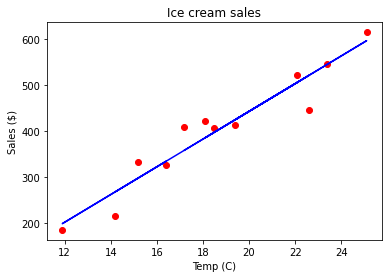

In [ ]:
plt.scatter(x,y, color = 'red')
plt.plot(x,y_predict, color ='blue')
plt.title('Ice cream sales')
plt.xlabel('Temp (C)')
plt.ylabel('Sales ($)')
plt.show()

Predict sales at 13 deg

In [ ]:
y_predict_13 = regressor.predict([[13]])
y_predict_13

array([231.66805098])

Plot residuals

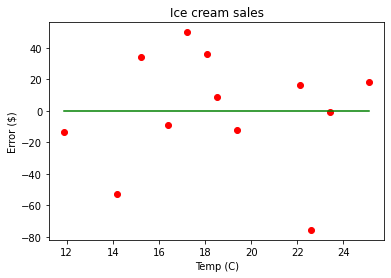

In [10]:
plt.scatter(x,y-y_predict, color = 'red')
plt.plot([x.min(),x.max()],[0,0], color ='green')
plt.title('Ice cream sales')
plt.xlabel('Temp (C)')
plt.ylabel('Error ($)')
plt.show()

Show metrics of model goodness

In [13]:
from sklearn import metrics
metrics.mean_squared_error(y, y_predict)
MSE = metrics.mean_squared_error(y, y_predict)
print("MSE: {:.4f}".format(MSE))
R2 = regressor.score(x,y)
print("R^2: {:.4f}".format(R2))

MSE: 1211.3584
R^2: 0.9168


Another way to calculate linear regression model including p=value

In [16]:
from scipy import stats
slope, inter, rval, pval, se = stats.linregress(x.reshape(1,-1),y)
print(f'a={slope}')
print(f'b={inter}')
print("R^2: {:.4f}".format(rval**2))
print("p-val: {:.4f}".format(pval))

a=30.087861794245196
b=-159.47415234086242
R^2: 0.9168
p-val: nan


/usr/local/lib/python3.7/dist-packages/scipy/stats/_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/usr/local/lib/python3.7/dist-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in sqrt
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


Another larger Data Set we will split data to train and test

In [17]:
df =pd.read_csv("mlcourse/data/Salary_Data.csv")

In [18]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [23]:
x=df.iloc[:,-2].values
y=df.iloc[:,-1].values
x
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
x = x.reshape(-1, 1)
regressor.fit(x,y)
y_predict = regressor.predict(x)

Exercise: For this example 

1.  Show scatter plot
2.  Fit the model get coef a&b
3.  Plot data and fittef model
4.  Check residuals
5.  Calculate MSE and R2

In [25]:
print('The parameters of the model y=ax+b are')
print(f'a={regressor.coef_[0]}')
print(f'b={regressor.intercept_}')


The parameters of the model y=ax+b are
a=9449.962321455076
b=25792.200198668696


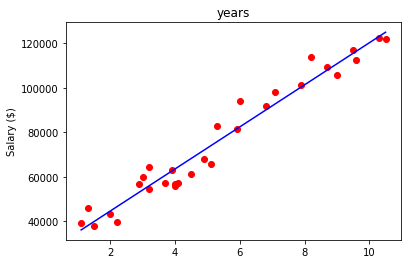

In [32]:
plt.scatter(x,y, color = 'red')
plt.plot(x,y_predict, color ='blue')
plt.title('years')
plt.ylabel('Salary ($)')
plt.show()

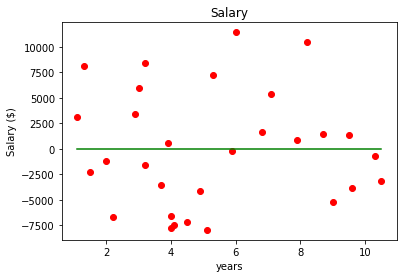

In [33]:
plt.scatter(x,y-y_predict, color = 'red')
plt.plot([x.min(),x.max()],[0,0], color ='green')
plt.title('Salary')
plt.xlabel('years')
plt.ylabel('Salary ($)')
plt.show()

In [30]:
from sklearn import metrics
metrics.mean_squared_error(y, y_predict)
MSE = metrics.mean_squared_error(y, y_predict)
print("MSE: {:.4f}".format(MSE))
RMSE = MSE**(0.5)
print("RMSE: {:.4f}".format(RMSE))
R2 = regressor.score(x,y)
print("R^2: {:.4f}".format(R2))

MSE: 31270951.7223
RMSE: 5592.0436
R^2: 0.9570


In [35]:
print(RMSE/y.mean()*100)


7.35766168277655


Let's separate it now to train and test to avoid overfit

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)